# lcld_analysis

This notebook demonstrates how to import and analyse the 'low-carbon-london-data' data from the [SmartMeter Energy Consumption Data in London Households](https://data.london.gov.uk/dataset/smartmeter-energy-use-data-in-london-households) dataset.

## Step 1: import packages

In [1]:
import sqlite3
import csv, os, time

See: https://docs.python.org/3/library/sqlite3.html for more details on the sqllite3 package

## Step 2: Create a connection to a new sqlite database

This creates the database file if it doesn't already exist.

In [2]:
conn = sqlite3.connect('low-carbon-london-data.sqlite')
c = conn.cursor()

You should now see the file in your local folder.

## Step 3: Remove the lcld table if it exists

If the database already exists, this removes the 'lcld' table so that it can be created anew.


In [3]:
try:
    c.execute("DROP TABLE lcld;")
    conn.commit()
except sqlite3.OperationalError:
    pass

## Step 4: Create a new table named 'lcld' and set the column names and data types:

In [4]:
c.execute("""CREATE TABLE lcld
                (LCLid TEXT, 
                stdorToU TEXT, 
                DateTime TEXT, 
                KWH_hh REAL, 
                Acorn TEXT, 
                Acorn_grouped TEXT);""")
conn.commit()

## Step 5: Set an index on column 'LCLid'

This will speed up any querys which use this column.

In [5]:
c.execute("CREATE INDEX index_LCLid ON lcld(LCLid);")
conn.commit()

## Step 6: Imports the data from the 11GB csv file.

This takes a long time to run (i.e. 70 minutes), and the size of the 'low-carbon-london-data.sqlite' created above will increase to approx 17 GB.

**NOTE: The filepath `fp` variable should be modified to the directory location of the csv file on the local computer.**

**NOTE: The filepath `rows_to_import` variable should be modified the number of rows to import - for all rows set as `None`**

In [6]:
fp=os.path.join(os.pardir,os.pardir,os.pardir,os.pardir,'_Data','SmartMeter_Energy_Consumption_Data')
filename='Power-Networks-LCL-June2015(withAcornGps)v2.csv'

rows_to_import=None

start_file_size=os.stat('low-carbon-london-data.sqlite').st_size
start_time=time.perf_counter()

with open (os.path.join(fp,filename),'r') as infile:
    
    content = csv.DictReader(infile, delimiter=',')
    
    for i,line in enumerate(content):
                
        try:
            d=float(line['KWH/hh (per half hour) '])
        except ValueError:
            d=None
                
        c.execute("INSERT INTO lcld VALUES (:a, :b, :c, :d, :e, :f)",
                      {'a':line['LCLid'], 
                       'b':line['stdorToU'],
                       'c':line['DateTime'],
                       'd':d, 
                       'e':line['Acorn'],
                       'f':line['Acorn_grouped']}
                      )
        
        if not rows_to_import is None: 
            if i == rows_to_import: 
                break

conn.commit()

end_file_size=os.stat('low-carbon-london-data.sqlite').st_size
end_time=time.perf_counter()

print('Number of rows imported:', i)
print('Time taken (minutes):', (end_time-start_time)/60)
print('Increase in file size (GB):', (end_file_size-start_file_size)/1000000000)

Number of rows imported: 167932473
Time taken (minutes): 72.348892665
Increase in file size (GB): 16.744681472


## Analysis:

The database is now ready for analysis.

### Read the data into a pandas dataframe

See this tutorial for the SQL: https://www.sqlitetutorial.net/sqlite-select/

In [7]:
import pandas as pd
sql="SELECT * FROM lcld LIMIT 10"
df=pd.read_sql(sql,conn,parse_dates=['DateTime'])
df

,LCLid,stdorToU,DateTime,KWH_hh,Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00,0.0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00,0.0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00,0.0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00,0.0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00,0.0,ACORN-A,Affluent
5,MAC000002,Std,2012-10-12 03:00:00,0.0,ACORN-A,Affluent
6,MAC000002,Std,2012-10-12 03:30:00,0.0,ACORN-A,Affluent
7,MAC000002,Std,2012-10-12 04:00:00,0.0,ACORN-A,Affluent
8,MAC000002,Std,2012-10-12 04:30:00,0.0,ACORN-A,Affluent
9,MAC000002,Std,2012-10-12 05:00:00,0.0,ACORN-A,Affluent


### Get the data from house 'MAC000002'

See this tutorial: https://www.sqlitetutorial.net/sqlite-where/

In [8]:
sql="SELECT * FROM lcld WHERE LCLid='MAC000002'"
df=pd.read_sql(sql,conn,parse_dates=['DateTime'])
df

,LCLid,stdorToU,DateTime,KWH_hh,Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00,0.000,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00,0.000,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00,0.000,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00,0.000,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00,0.000,ACORN-A,Affluent
5,MAC000002,Std,2012-10-12 03:00:00,0.000,ACORN-A,Affluent
6,MAC000002,Std,2012-10-12 03:30:00,0.000,ACORN-A,Affluent
7,MAC000002,Std,2012-10-12 04:00:00,0.000,ACORN-A,Affluent
8,MAC000002,Std,2012-10-12 04:30:00,0.000,ACORN-A,Affluent
9,MAC000002,Std,2012-10-12 05:00:00,0.000,ACORN-A,Affluent


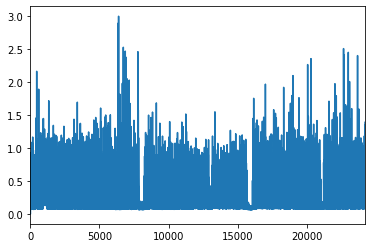

In [9]:
%matplotlib inline
df['KWH_hh'].plot()

### Get the number of rows for each house

See this tutorial: https://www.sqlitetutorial.net/sqlite-group-by/

This takes a while to run as it has to query every row in the database. Use `LIMIT` when first developing this query.

In [10]:
sql="SELECT LCLid, COUNT(LCLid) AS NUMBER_OF_ROWS FROM lcld GROUP BY LCLid"
df=pd.read_sql(sql,conn,parse_dates=['DateTime'])
df

,LCLid,NUMBER_OF_ROWS
0,MAC000002,24158
1,MAC000003,35469
2,MAC000004,31677
3,MAC000005,30527
4,MAC000006,36461
5,MAC000007,25046
6,MAC000008,26013
7,MAC000009,25238
8,MAC000010,25049
9,MAC000011,23705


### Get average power consumption for each house

Again, this takes a while to run.

In [11]:
sql="SELECT LCLid, avg(KWH_hh) AS AVERAGE_POWER FROM lcld GROUP BY LCLid"
df=pd.read_sql(sql,conn)
df

,LCLid,AVERAGE_POWER
0,MAC000002,0.252562
1,MAC000003,0.397666
2,MAC000004,0.035383
3,MAC000005,0.095388
4,MAC000006,0.059471
5,MAC000007,0.197805
6,MAC000008,0.363102
7,MAC000009,0.178903
8,MAC000010,0.550394
9,MAC000011,0.314299
